# Sushi Recommender 

## Recommendation Systems

We are going to use two different approaches to create the system to recommend sushis to users. The types of recommendation systems created are as follows:

1. Content Based Recommendation
2. User Based Recommendation

## Data Sets

We are going to use the following 2 data sets, both of them are from https://www.kamishima.net/sushi/#:~:text=The%20SUSHI%20Preference%20Data%20Set,additionally%20by%20a%20ranking%20method:

### 1. sushi.3idata

* This data contains the characteristics of each 100 kinds of sushi (name of the sushi along with the english translation are as figure 1)
* Each row corresponds to sushi and each column corresponds to characteristic
* The characteristics included in the dataset is as below

1. item ID
2. name (in Japanese with Roman alphabets)
3. style         0:maki      1:otherwise (see Wikipedia)
4. major group   0:seafood   1:otherwise
   0 corresponds to the minor group nos 0--8.
5. minor group
    0:aomono (blue-skinned fish)
    1:akami (red meat fish)
    2:shiromi (white-meat fish)
    3:tare (something like baste; for eel or sea eel)
    4:clam or shell
    5:squid or octopus
    6:shrimp or crab
    7:roe
    8:other seafood
    9:egg
   10:meat other than fish
   11:vegetables
6. the heaviness/oiliness in taste, range[0-4] 0:heavy/oily
7. how frequently the user eats the SUSHI, range[0-3] 3:frequently eat
8. normalized price
9. how frequently the SUSHI is sold in sushi shop, range[0-1] 1:the most frequently

- features 3-5 are categorical, and features 6-9 are numerical

Index|Name of Sushi|Name in English
| --- | --- | --- |
0|ebi|shrimp|
1|anago|sea eel|
2|maguro|tuna|
3|ika|squid|
4|uni|sea urchin|
5|tako|octopus|
6|ikura|salmon roe|
7|tamago|egg|
8|toro|fatty tuna|
9|amaebi|AMA shrimp|
10|hotategai|scallop|
11|tai|sea bream|
12|akagai|ark shell|
13|hamachi|young yellowtail|
14|awabi|abalone|
15|samon|salmon|
16|kazunoko|herring roe|
17|shako|squilla|
18|saba|mackerel|
19|chu_toro|mildly_fatty tuna|
20|hirame|flatfish|
21|aji|horse mackerel|
22|kani|crab|
23|kohada|medium_sized KONOSHIRO gizzard shad|
24|torigai|TORI_clam|
25|unagi|eel|
26|tekka_maki|tuna roll|
27|kanpachi|amberjack|
28|mirugai|MIRU_clam|
29|kappa_maki|cucumber roll|
30|geso|squid feet|
31|katsuo|oceanic bonito|
32|iwashi|sardine|
33|hokkigai|HOKKI-clam|
34|shimaaji|hardtail|
35|kanimiso|crab liver|
36|engawa|flesh from around the base of the dorsal and ventral fins of a flounder or flatfish|
37|negi_toro|fatty flesh of tuna minced to a paste and mixed with chopped green leaves of Welsh onions|
38|nattou_maki|fermented bean roll|
39|sayori|halfbeak|
40|takuwan_maki|DAIKON pickles roll|
41|botanebi|BOTAN shrimp|
42|tobiko|flying fish roe|
43|inari|fried tofu wrapper; http://en.wikipedia.org/wiki/Sushi)|
44|mentaiko|chili cod roe|
45|sarada|salad|
46|suzuki|sea bass|
47|tarabagani|king crab|
48|ume_shiso_maki|pickled plum & perilla leaf roll|
49|komochi_konbu (herring roe & sea tangle)
50|tarako|cod roe|
51|sazae|turban shell|
52|aoyagi|meat of a trough shell|
53|toro_samon|fatty tuna & salmon|
54|sanma|Pacific saury|
55|hamo|pike conger|
56|nasu|egg plant|
57|shirauo|Japanese icefish|
58|nattou|fermented bean|
59|ankimo|angler liver|
60|kanpyo_maki|pickled gourd_maki|
61|negi_toro_maki|roll style of no.37|
62|gyusashi|raw beef|
63|hamaguri|clam|
64|basashi|raw horse meat|
65|fugu|blowfish|
66|tsubugai|TSUBU_shell|
67|ana_kyu_maki|sea eel & cucumber roll|
68|hiragai|=tairagi; pen shell|
69|okura|gumbo|
70|ume_maki|pickled plum roll|
71|sarada_maki|salad roll|
72|mentaiko_maki|chili cod roe roll|
73|buri|yellowtail|
74|shiso_maki|perilla leaf roll|
75|ika_nattou|squid & fermented bean|
76|zuke|tuna pickled in soy sauce|
77|himo|part of clam|
78|kaiware|DAIKON radish sprouts|
79|kurumaebi|prawn|
80|mekabu|part of tangle|
81|kue|kind of cabrilla|
82|sawara|Japanese Spanish mackerel|
83|sasami|kind of raw chicken|
84|kujira|whale|
85|kamo|wild duck|
86|himo_kyu_maki|part of clam & cucumber roll|
87|tobiuo|flying fish|
88|ishigakidai|ishigaki sea bream|
89|mamakari|Japanese scaled sardine|
90|hoya|ascidian|
91|battera|OSHIZUSHI style mackerel|
92|kyabia|caviar|
93|karasumi|dried mullet roe|
94|uni_kurage|sea urchin & jellyfish|
95|karei|flounder|
96|hiramasa|something like amberjack|
97|namako|sea cucumber|
98|shishamo|smelt|
99|kaki|oyster|

Table 1: Name of sushi and their names in English

### 2. sushi3b.5000.10.score

- This data set contains he results of a ranking method questioning 5,000 people about their sushi preferences.
- Each row corresponds to a user and each column corresponds to sushi listed in Table 1.
- The evaluation values are on a 5-point scale, from 0 indicating dislike to 4 like the most, and -1 indicating no evaluation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

df_sushi_characteristics = pd.read_csv('sushi3.idata',sep='\t',header=None)
df_sushi_preference = pd.read_csv('sushi3b.5000.10.score',sep=' ',header=None)

In [2]:
characteristics = {
0: 'item_ID',
1: 'name',
2: 'style',     
3: 'major_group',  
4: 'minor_group',  
5: 'heaviness',
6: 'frequency_eat',
7: 'price',
8: 'frequency_sold'
}

In [3]:
names = {
 0:'ebi',
 1:'anago',
 2:'maguro',
 3:'ika',
 4:'uni',
 5:'tako',
 6:'ikura',
 7:'tamago',
 8:'toro',
 9:'amaebi',
10:'hotategai',
11:'tai',
12:'akagai',
13:'hamachi',
14:'awabi',
15:'samon',
16:'kazunoko',
17:'shako',
18:'saba',
19:'chu_toro',
20:'hirame',
21:'aji',
22:'kani',
23:'kohada',
24:'torigai',
25:'unagi',
26:'tekka_maki',
27:'kanpachi',
28:'mirugai',
29:'kappa_maki',
30:'geso',
31:'katsuo',
32:'iwashi',
33:'hokkigai',
34:'shimaaji',
35:'kanimiso',
36:'engawa',
37:'negi_toro',
38:'nattou_maki',
39:'sayori',
40:'takuwan_maki',
41:'botanebi',
42:'tobiko',
43:'inari',
44:'mentaiko',
45:'sarada',
46:'suzuki',
47:'tarabagani',
48:'ume_shiso_maki',
49:'komochi_konbu',
50:'tarako',
51:'sazae',
52:'aoyagi',
53:'toro_samon',
54:'sanma',
55:'hamo',
56:'nasu',
57:'shirauo',
58:'nattou',
59:'ankimo',
60:'kanpyo_maki',
61:'negi_toro_maki',
62:'gyusashi',
63:'hamaguri',
64:'basashi',
65:'fugu',
66:'tsubugai',
67:'ana_kyu_maki',
68:'hiragai',
69:'okura',
70:'ume_maki',
71:'sarada_maki',
72:'mentaiko_maki',
73:'buri',
74:'shiso_maki',
75:'ika_nattou',
76:'zuke',
77:'himo',
78:'kaiware',
79:'kurumaebi',
80:'mekabu',
81:'kue',
82:'sawara',
83:'sasami',
84:'kujira',
85:'kamo',
86:'himo_kyu_maki',
87:'tobiuo',
88:'ishigakidai',
89:'mamakari',
90:'hoya',
91:'battera',
92:'kyabia',
93:'karasumi',
94:'uni_kurage',
95:'karei',
96:'hiramasa',
97:'namako',
98:'shishamo',
99:'kaki'
}

In [4]:
df_sushi_characterisitcs = df_sushi_characteristics.rename(columns=characteristics)

In [5]:
df_sushi_characterisitcs.head()

,item_ID,name,style,major_group,minor_group,heaviness,frequency_eat,price,frequency_sold
0,0,ebi,1,0,6,2.728978,2.138422,1.838420,0.84
1,1,anago,1,0,3,0.926384,1.990228,1.992459,0.88
2,2,maguro,1,0,1,1.769559,2.348506,1.874725,0.88
3,3,ika,1,0,5,2.688401,2.043240,1.515152,0.92
4,4,uni,1,0,8,0.813043,1.643478,3.287282,0.88


## Correlation Matrix of Sushi Characteristics

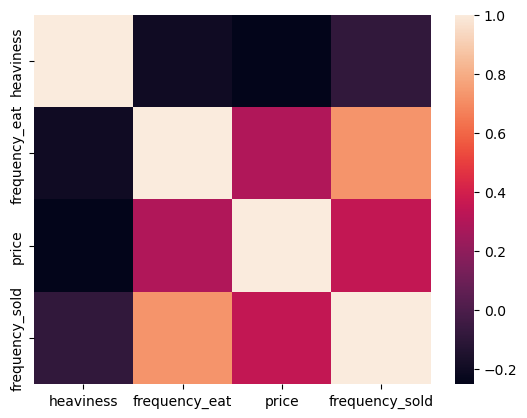

In [6]:
import matplotlib.pyplot as plt
cormat = df_sushi_characterisitcs[['heaviness','frequency_eat','price','frequency_sold']].corr()
heatmap = sns.heatmap(cormat)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [7]:
df_sushi_preference = df_sushi_preference.rename(columns=names)
df_sushi_preference = df_sushi_preference.replace(-1, np.nan)

In [8]:
df_sushi_preference.head()

,ebi,anago,maguro,ika,uni,tako,ikura,tamago,toro,amaebi,...,hoya,battera,kyabia,karasumi,uni_kurage,karei,hiramasa,namako,shishamo,kaki
0,NaN,0.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,3.0,4.0,1.0,NaN,NaN,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
pd.DataFrame(df_sushi_preference.mean(axis=0).sort_values(ascending=False).head(),columns=[['mean_score']])

,mean_score
chu_toro,3.460815
toro,3.433762
negi_toro,3.398496
maguro,3.334993
tarabagani,3.303279


## Content Based Recommendation

In [10]:
df_features = df_sushi_characterisitcs[['minor_group','heaviness','price']]
df_features_encoded = pd.get_dummies(df_features, columns=['minor_group'], drop_first=True)
df_features_normalized = (df_features_encoded - df_features_encoded.min()) / (df_features_encoded.max() - df_features_encoded.min())
df_features_normalized = df_features_normalized.rename(index=names)

#Add 1 to each score and replace NA with 0
df_sushi_preference = df_sushi_preference.applymap(lambda x: x + 1 if pd.notna(x) else x)
df_sushi_preference = df_sushi_preference.fillna(0) 

In [11]:
def content_based_recommendations(user_id, df_sushi_preference, df_features_normalized, n_items=5):
    
    #Find the dot product of user preferences data and normalized sushi characteristics data
    user_profiles = df_sushi_preference.dot(df_features_normalized)
    
    #Find cosine similarity between user profile data and sushi characteristics data
    cosine_sim = cosine_similarity(user_profiles, df_features_normalized)
    cosine_sim_df = pd.DataFrame(cosine_sim, index=df_sushi_preference.index, columns=df_sushi_preference.columns)
    
    #When there is no user_id found in the data, recommmend top 5 popular sushi
    if user_id not in df_sushi_preference.index:
        most_popular = df_sushi_preference.replace(0, pd.NA).mean().sort_values(ascending=False)
        return most_popular.head(n_items)
    
    recommended_sushis = cosine_sim_df.loc[user_id].sort_values(ascending=False)

    return recommended_sushis.head(n_items)

## User Based Recommendation

In [12]:
user_similarity = cosine_similarity(df_sushi_preference)

In [13]:
user_similarity_df = pd.DataFrame(user_similarity, index=df_sushi_preference.index, columns=df_sushi_preference.index)

In [14]:
def user_based_recommendations(user_id, df_sushi_preference, n_items=5):
    
     #When there is no user_id found in the data, recommmend top 5 popular sushi
    if user_id not in df_sushi_preference.index:
        most_popular = df_sushi_preference.replace(0, pd.NA).mean().sort_values(ascending=False)
        return most_popular.head(n_items)

    # Get the similarity scores for the user in question with all users
    user_similarity = cosine_similarity(df_sushi_preference)
    user_similarity_df = pd.DataFrame(user_similarity, index=df_sushi_preference.index, columns=df_sushi_preference.index)
    
    sim_scores = user_similarity_df[user_id]
    similar_users = sim_scores.sort_values(ascending=False).iloc[1:n_items+1]

    preferences_similar_users = df_sushi_preference.loc[similar_users.index]
    
    #Ratings of the similar users are multiplied by the similarities
    preferences_similar_users = preferences_similar_users.multiply(similar_users, axis=0)
    recommendation_scores = preferences_similar_users.sum(axis=0).div(similar_users.sum())

    # Sort the recommended sushi types in descending order
    recommendations = recommendation_scores.sort_values(ascending=False)
    
    return recommendations.head(n_items)

In [15]:
user_based_recommendations(0, df_sushi_preference)

ika       4.567058
nattou    3.957541
akagai    1.806915
uni       1.578726
aoyagi    1.406226
dtype: float64

## Calculate Precision

In [16]:
#Calculate the hit rate of the user
def calculate_precision(user_id, recommendations, test_df):
# Get the sushi types that the user has rated more than 1 in the test set
    relevant_items = set(test_df.columns[test_df.loc[user_id] > 1])
    
    # Convert the list of recommended sushi names into a set 
    recommended_items = set(recommendations.index)

    # Find the intersection of relevant and recommended items
    relevant_and_recommended = relevant_items.intersection(recommended_items)

    # Calculate precision
    precision = len(relevant_and_recommended) / len(recommended_items) if recommended_items else 0
    return precision

In [17]:
#Rondomly takes a subset of the data as test_set and find the average hit rate for each recommendation system
def find_avg_precision(df_features_normalized):
    _, test_df = train_test_split(df_sushi_preference, test_size=0.2, random_state=42)
    precisions_content_based = []
    precisions_user_based = []
    for user_id in test_df.index:
        if user_id in user_similarity_df.columns: 
            recommendations_content_based = content_based_recommendations(user_id, test_df, df_features_normalized, n_items=5)
            recommendations_user_based = user_based_recommendations(user_id, test_df, n_items=5)
            user_precision_content_based = calculate_precision(user_id, recommendations_content_based, test_df)
            user_precision_user_based = calculate_precision(user_id, recommendations_user_based, test_df)
            precisions_content_based.append(user_precision_content_based)
            precisions_user_based.append(user_precision_user_based)
    
    average_precision_content_based = sum(precisions_content_based) / len(precisions_content_based) 
    average_precision_user_based = sum(precisions_user_based) / len(precisions_user_based) 
    
    return average_precision_content_based,average_precision_user_based

In [18]:
#Test with the 5 random test sets and average the hit rate
lst_precision_content = []
lst_precision_user = []
for i in range(5):
    precison_content, precision_user = find_avg_precision(df_features_normalized)
    lst_precision_content.append(precison_content)
    lst_precision_user.append(precision_user)
    i = i + 1
print(np.array(lst_precision_content).mean())
print(np.array(lst_precision_user).mean())

0.18459999999999954
0.8909999999999952
